%matplotlib inline:

Facilita a plotagem de gráficos do matplotlib logo abaixo das células de código e o armazenamento delas no documento do notebook

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import yfinance as yf

In [5]:
yf.pdr_override()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [6]:
assets= ['PG','^GSPC']
pf_data= pd.DataFrame()

for a in assets:

    pf_data[a] = wb.get_data_yahoo(a, start='2010-1-1')['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
pf_data.tail()

,PG,^GSPC
Date,,
2024-07-10,166.800003,5633.910156
2024-07-11,165.539993,5584.540039
2024-07-12,166.610001,5615.350098
2024-07-15,164.580002,5631.220215
2024-07-16,166.949997,5667.200195


<Axes: xlabel='Date'>

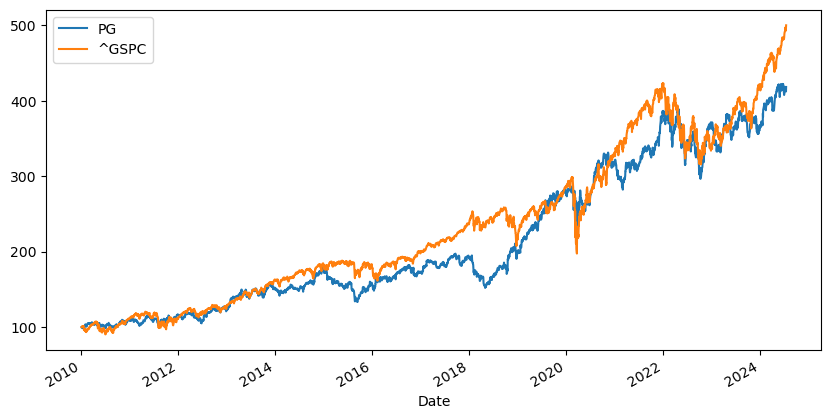

In [8]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [10]:
log_returns= np.log(pf_data / pf_data.shift(1))

In [13]:
log_returns.mean() * 250

PG       0.097870
^GSPC    0.110082
dtype: float64

In [14]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.028928,0.016331
^GSPC,0.016331,0.029902


(55%)0.555257 > 30% 

In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.555257
^GSPC,0.555257,1.000000


In [12]:
num_assets= len(assets)

2: PG e SP500

In [15]:
num_assets

2

In [16]:
arr= np.random.random(2)
arr

array([0.98008149, 0.64176664])

In [17]:
arr[0] + arr[1]

1.621848124977764

In [18]:
weights= np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.21009007, 0.78990993])

In [19]:
weights[0] + weights[1]

1.0

Parte II

Retorno Esperado do Portfólio:

In [21]:
np.sum(weights * log_returns.mean()) * 250

0.10751625941577456

Variança Esperada do Portfólio:

In [22]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02535474256631415

Volatilidade Esperada do Portfólio:

In [23]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.15923172600431784

Simulação de 1.000 combinações dos mesmos ativos

Em lista:

In [ ]:
pfolio_returns= []
pfolio_volatilities=[]

for x in range(1000):
    weights= np.random.random(num_assets)
    weights /= np.sum(weights)
    # Calculo de Retorno Portfolio
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    # Calculo Volatilidade do Portfolio
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

Em formato de Matriz:

In [ ]:
pfolio_returns= []
pfolio_volatilities=[]

for x in range(1000):
    weights= np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns= np.array(pfolio_returns)
pfolio_returns= np.array(pfolio_volatilities)


pfolio_returns, pfolio_volatilities

Visualização Dos Dados

Criação Data Frame

In [32]:
portfolios= pd.DataFrame({'Return': pfolio_returns,
                          'Volatility': pfolio_volatilities})

In [33]:
portfolios.head()

,Return,Volatility
0,0.108108,0.161862
1,0.103085,0.151464
2,0.104022,0.151251
3,0.102120,0.152740
4,0.106288,0.154904


In [34]:
portfolios.tail()

,Return,Volatility
995,0.103154,0.151413
996,0.108463,0.163594
997,0.099083,0.163353
998,0.103843,0.151213
999,0.105079,0.152231


Text(0, 0.5, 'Expected Return')

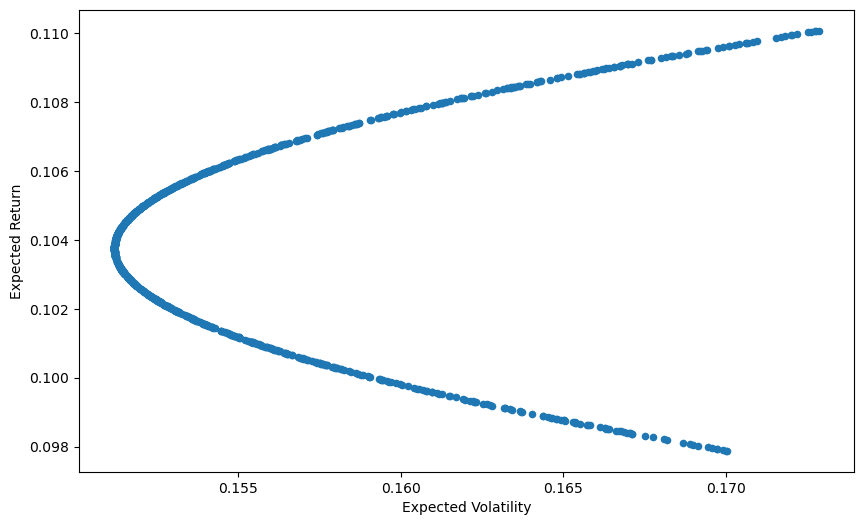

In [35]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')